In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def show_pickled_images(pkl_paths, cmap="gray", vmax=None):
    """
    Load and display images stored in pickle (.pkl) files.

    Args:
        pkl_paths (list[str or Path]): List of paths to .pkl files.
        cmap (str): Matplotlib colormap (default: 'gray').
        vmax (float): Optional max value for visualization.

    Each pickle file is expected to contain a NumPy array, e.g.:
        - shape (H, W)
        - shape (C, H, W)
        - shape (N, H, W, C)
    """
    if not isinstance(pkl_paths, (list, tuple)):
        raise TypeError("pkl_paths must be a list or tuple of file paths.")

    fig, axes = plt.subplots(1, len(pkl_paths), figsize=(5 * len(pkl_paths), 5))
    if len(pkl_paths) == 1:
        axes = [axes]  # make iterable for single image case

    for ax, path in zip(axes, pkl_paths):
        path = Path(path)
        if not path.exists():
            ax.axis("off")
            ax.set_title(f"❌ Missing: {path.name}")
            continue

        # Load pickled object
        with open(path, "rb") as f:
            try:
                data = pickle.load(f)
            except Exception:
                import dill
                data = dill.load(f)

        # Convert to numpy
        arr = np.array(data)

        # Try to pick a sensible channel to show
        if arr.ndim == 4:   # e.g. (N, H, W, C)
            img = arr[0, :, :, 1]
        elif arr.ndim == 3: # e.g. (H, W, C)
            img = arr[:, :, 1]
        elif arr.ndim == 2: # e.g. (H, W)
            img = arr
        else:
            raise ValueError(f"Unsupported array shape {arr.shape} in {path}")

        ax.imshow(img, cmap=cmap)#, vmax=vmax or np.quantile(img, 0.99))
        ax.axis("off")
        ax.set_title(path.name, fontsize=10)

    plt.tight_layout()
    plt.show()


/tmp/ipykernel_4793/3587047710.py:59: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


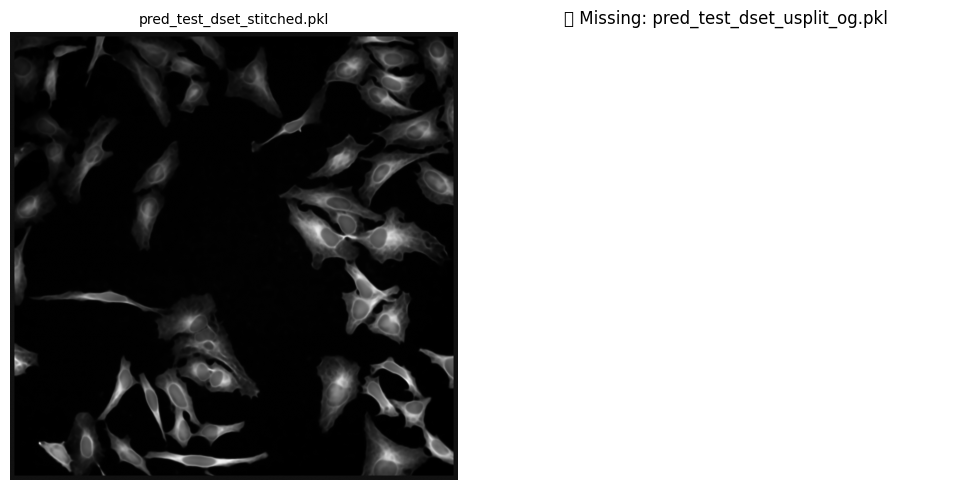

In [3]:
show_pickled_images(["/group/jug/aman/microsplit_runs_22Oct25/HT_LIF24/pred_test_dset_stitched.pkl","microsplit_runs_22Oct25/HT_LIF24/pred_test_dset_usplit_og.pkl"])